# Beispiel: XOR mit Perzeptron
[Video](https://mstream.hm.edu/paella/ui/watch.html?id=b1fa7751-65c4-4db6-98d4-16666c8acf5a)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Gebe Daten ein, um XOR-Funktion zu definieren.
\begin{aligned}
  (0,0) &\mapsto 0\\
  (0,1) &\mapsto 1\\
  (1,0) &\mapsto 1\\
  (1,1) &\mapsto 0
\end{aligned}

In [ ]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

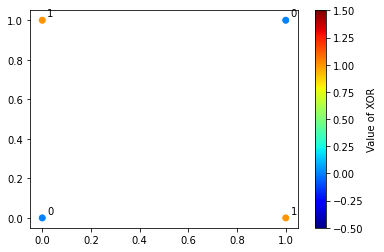

In [ ]:
plt.scatter(x[:,0],x[:,1], c=y[:,0], cmap=plt.cm.get_cmap('jet'))
plt.colorbar(label='Value of XOR')
plt.clim(-0.5,1.5)
for i,v in enumerate(y[:,0]):
    plt.annotate(v, (x[i,0]+.02, x[i,1]+.02))

### Definiere Modell

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden (Dense)               (None, 2)                 6         
_________________________________________________________________
Output (Dense)               (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


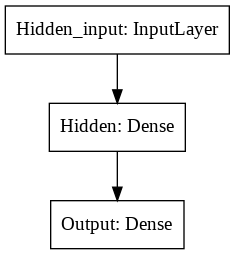

In [ ]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Dense(2, input_dim=2,activation = "relu", name="Hidden")) #Layer 1
model.add(keras.layers.Dense(1, activation = "linear", name="Output", use_bias=True)) #Output Layer

model.compile(optimizer='sgd',loss='mean_squared_error')
model.summary()
keras.utils.plot_model(model)

### Trainiere Modell

In [ ]:
history = model.fit(x, y, epochs=50, batch_size=1);

Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5565
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5079
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4785
Epoch 4/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4609
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.4447
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4349
Epoch 7/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4239
Epoch 8/50
4/4 [==============================] - 0s 970us/step - loss: 0.4145
Epoch 9/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4079
Epoch 10/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4027
Epoch 11/50
4/4 [==============================] - 0s 1ms/step - loss: 0.3953
Epoch 12/50
4/4 [==============================] - 0s 1ms/step - loss: 0.3914
Epoch 13/50
4/4 [==============================] - 0s 1ms/step - loss: 

### Betrachte Ergebnis

In [ ]:
y_learned = model.predict(x)[:,0]
y_learned

array([0.22245103, 0.43561465, 0.5020077 , 0.71517134], dtype=float32)

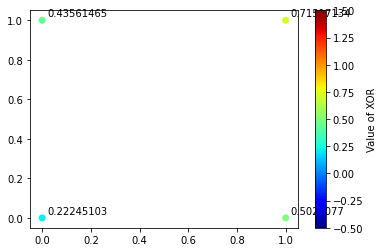

In [ ]:
plt.scatter(x[:,0],x[:,1], c=y_learned, cmap=plt.cm.get_cmap('jet'))
plt.colorbar(label='Value of XOR')
plt.clim(-0.5,1.5)

for i,v in enumerate(y_learned):
    plt.annotate(v, (x[i,0]+.02, x[i,1]+.02))

### Wie kommt das zustande?
Untersuche die gelernten Gewichte:

In [ ]:
hidden = model.layers[0]
hidden.name

'Hidden'

In [ ]:
output = model.layers[1]
output.name

'Output'

In [ ]:
w_hidden, b_hidden = hidden.get_weights()
w_out, b_out = output.get_weights()

In [ ]:
w_hidden, b_hidden

(array([[ 0.36524275, -0.63235736],
        [ 0.2784997 , -0.27096993]], dtype=float32),
 array([0.10270096, 0.        ], dtype=float32))

In [ ]:
w_out, b_out

(array([[0.76539975],
        [0.20170331]], dtype=float32), array([0.14384376], dtype=float32))

### "Perfekte" Werte
Eine perfekte Lösung würde erreicht mit folgenden Werten:  
w_hidden = [[1,1], [1,1]]  
b_hidden = [0, -1]  
w_out = [1, -2]  
b_out = 0

Wenn wir diese verwenden, funktioniert es:

Hidden Layer:

In [ ]:
# Erzeuge Array mit den korrekten Gewichten:
l=[]
w=np.array([[1,1],[1,1]]) #weights
b=np.array([0,-1]) #array of biases
l.append(w)
l.append(b)

# Setze die Gewichte des Hidden Layers entsprechend
hidden.set_weights(l)

Output Layer:

In [ ]:
# Erzeuge Array mit den korrekten Gewichten:
l=[]
w=np.array([[1],[-2]]) #weights
b=np.array([0]) #array of biases
l.append(w)
l.append(b)

# Setze die Gewichte des Output Layers entsprechend
output.set_weights(l)

Liefert folgenden Ergebnis:

In [ ]:
y_learned = model.predict(x)[:,0]
y_learned

array([0., 1., 1., 0.], dtype=float32)

## Kann das nicht auch trainiert werden?

In [ ]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Dense(2, input_dim=2,activation = "relu", name="Hidden", kernel_initializer="he_uniform")) #Layer 1
model.add(keras.layers.Dense(1, activation = "linear", name="Output", use_bias=True)) #Output Layer

model.compile(optimizer='sgd',loss='mean_squared_error')

# Anfängliche Gewichte:
hidden = model.layers[0]
output = model.layers[1]
w_hidden_start, b_hidden_start = hidden.get_weights()
w_out_start, b_out_start = output.get_weights()

### Durchrechnen des Modells mit den Startwerten der Gewichte
Hypothese: Wir benötigen einen *brauchbaren* Startwert für die Gewichte, sonst läuft der Optimierer in ein lokales Minimum und bleibt dort stecken.

In [ ]:
print("Hidden Layer:\n w= ", w_hidden_start, "\n b=", b_hidden_start, "\n\n Output Layer:\n w=", w_out_start, "\n b=", b_out_start)

Hidden Layer:
 w=  [[-0.56464314  0.608286  ]
 [ 0.5386113   0.557063  ]] 
 b= [0. 0.] 

 Output Layer:
 w= [[-0.3236699 ]
 [ 0.84401596]] 
 b= [0.]


#### Aus diesen Werten können wir ggf. auch manuell die Ergebnisse berechnen:


1.   Verwende Matrixprodukt `np.dot()`, um $x^T W + b$ zu berechnen.
> - Das ergibt einen Vektor, der die Werte der Neuronen im Hidden Layer vor Anwendung der Aktivierungsfunktion angibt.
2.   Wende Aktivierungsfunktion (`ReLU`) an, d.h. $\max(0, \cdot)$
> - Das ergibt einen Vektor, der das Endergebnis der Neuronen im Hidden Layer angibt.
3. Verwende wieder das Matrixprodukt, um die Linearkombination + Bias im Output Layer zu berechnen.
> - Das ist das Endergebnis.

In [ ]:
a = np.dot([0,1],w_hidden_start) + b_hidden_start   # Hidden Layer vor Aktivierungsfunktion
a

array([0.53861129, 0.55706298])

In [ ]:
b = np.maximum(a, 0)
b

array([0.53861129, 0.55706298])

In [ ]:
np.dot(b, w_out_start) + b_out_start   # Wende ReLU auf obiges Ergebnis an und verwende entsprechende Werte hier

array([0.29583778])

#### Natürlich können wir dieses Ergebnis auch bekommen, wenn wir die aktuelle Version des Modells auf die `x`-Daten anwenden:

In [ ]:
model.predict(x)

array([[0.        ],
       [0.29583776],
       [0.5134031 ],
       [0.98357314]], dtype=float32)

## Trainieren

In [ ]:
print("Vorhersage mit Ausgangsmodell:\n", model.predict(x), "\n\n Modell wird trainiert...\n")
history = model.fit(x, y, epochs=1000, batch_size=1, verbose=0);
print("Vorhersage mit trainiertem Modell:\n", model.predict(x))

Vorhersage mit Ausgangsmodell:
 [[4.6091212e-04]
 [9.9968046e-01]
 [9.9986404e-01]
 [7.9122401e-05]] 

 Modell wird trainiert...

Vorhersage mit trainiertem Modell:
 [[1.9092909e-06]
 [9.9999869e-01]
 [9.9999851e-01]
 [9.1483014e-07]]


## Was macht das Hidden Layer?

Wir extrahieren die Gewichte des Hidden Layer:

In [ ]:
w_hidden, b_hidden = model.layers[0].get_weights()
w_out, b_out = model.layers[1].get_weights()

In [ ]:
w_hidden, b_hidden

(array([[1.5651459 , 1.3621459 ],
        [0.99920624, 1.0615251 ]], dtype=float32),
 array([ 2.7066619e-08, -1.0615277e+00], dtype=float32))

Nun lassen wir alle vier Datenpunkte durch das Hidden Layer laufen:

Zuerst nur durch die affine Transformation...

In [ ]:
interim_result_hidden = np.dot(x,w_hidden) + b_hidden
interim_result_hidden

array([[ 2.70666192e-08, -1.06152773e+00],
       [ 9.99206272e-01, -2.62260437e-06],
       [ 1.56514588e+00,  3.00618172e-01],
       [ 2.56435212e+00,  1.36214328e+00]])

... und dann noch durch die ReLU-Aktivierungsfunktion:

In [ ]:
result_hidden = np.maximum(interim_result_hidden, 0)
result_hidden

array([[2.70666192e-08, 0.00000000e+00],
       [9.99206272e-01, 0.00000000e+00],
       [1.56514588e+00, 3.00618172e-01],
       [2.56435212e+00, 1.36214328e+00]])

Nun visualisieren wir, was das Hidden Layer insgesamt aus den vier Datenpunkten gemacht hat. Wir plotten dazu das aktuelle Bild dieser vier Punkte:

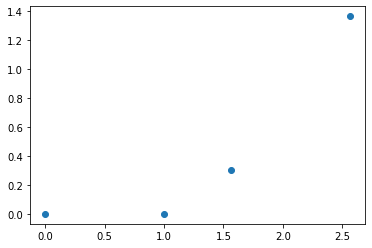

In [ ]:
plt.scatter(result_hidden[:,0], result_hidden[:,1])

Diese vier Punkte (mit transformierten Koordinaten) können nun vom Output Layer linear getrennt werden.

In [ ]:
np.dot(result_hidden,w_out) + b_out

array([[1.90929084e-06],
       [9.99998718e-01],
       [9.99998501e-01],
       [9.54417962e-07]])

In [ ]:
b_out

array([1.8822028e-06], dtype=float32)